In [1]:
import pandas as pd

df_simulado = {
    'modelo': ['Modelo A', 'Modelo B', 'Modelo C', 'Modelo A', 'Modelo D'],
    'marca': ['Marca X', 'Marca Y', 'Marca Z', 'Marca X', 'Marca W'],
    'ano_pesquisa': ['1st Wave of 2022', '2nd Wave of 2022', '1st Wave of 2023', '2nd Wave of 2023', '1st Wave of 2024'],
    'produto': ['Poltrona', 'Volante', 'Conforto', 'Preço', 'Desempenho'],
    'comentario': [
        'A poltrona do carro é desconfortável após algumas horas de uso.',
        'O volante parece pequeno, mas tem uma boa aderência.',
        'O conforto geral do carro é excelente, especialmente em longas viagens.',
        'O preço está um pouco acima da média comparado a outros modelos.',
        'O desempenho do carro é incrível, com aceleração rápida e ótima estabilidade.'
    ]
}

df_simulado = pd.DataFrame(df_simulado)


In [2]:
print(df_simulado)

     modelo    marca      ano_pesquisa     produto  \
0  Modelo A  Marca X  1st Wave of 2022    Poltrona   
1  Modelo B  Marca Y  2nd Wave of 2022     Volante   
2  Modelo C  Marca Z  1st Wave of 2023    Conforto   
3  Modelo A  Marca X  2nd Wave of 2023       Preço   
4  Modelo D  Marca W  1st Wave of 2024  Desempenho   

                                          comentario  
0  A poltrona do carro é desconfortável após algu...  
1  O volante parece pequeno, mas tem uma boa ader...  
2  O conforto geral do carro é excelente, especia...  
3  O preço está um pouco acima da média comparado...  
4  O desempenho do carro é incrível, com aceleraç...  


In [3]:
import re

# Lista de stop words em português (pode ser ajustada conforme necessário)
stop_words = ['a', 'o', 'é', 'de', 'do', 'da', 'os', 'as', 'em', 'por', 'para', 'com', 'no', 'na', 'que', 'um', 'uma', 'e']

# Função para pré-processar os comentários (remover stop words, pontuação e normalizar para minúsculas)
def preprocess_text(text):
    # Remover pontuação
    text = re.sub(r'[^\w\s]', '', text)
    # Transformar em minúsculas
    text = text.lower()
    # Remover stop words
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)


# Aplicando a função a cada comentário no DataFrame
df_simulado['comentario_processado'] = df_simulado['comentario'].apply(preprocess_text)

# Exibindo o DataFrame atualizado
print(df_simulado[['comentario', 'comentario_processado']])


                                          comentario  \
0  A poltrona do carro é desconfortável após algu...   
1  O volante parece pequeno, mas tem uma boa ader...   
2  O conforto geral do carro é excelente, especia...   
3  O preço está um pouco acima da média comparado...   
4  O desempenho do carro é incrível, com aceleraç...   

                               comentario_processado  
0  poltrona carro desconfortável após algumas hor...  
1       volante parece pequeno mas tem boa aderência  
2  conforto geral carro excelente especialmente l...  
3  preço está pouco acima média comparado outros ...  
4  desempenho carro incrível aceleração rápida ót...  


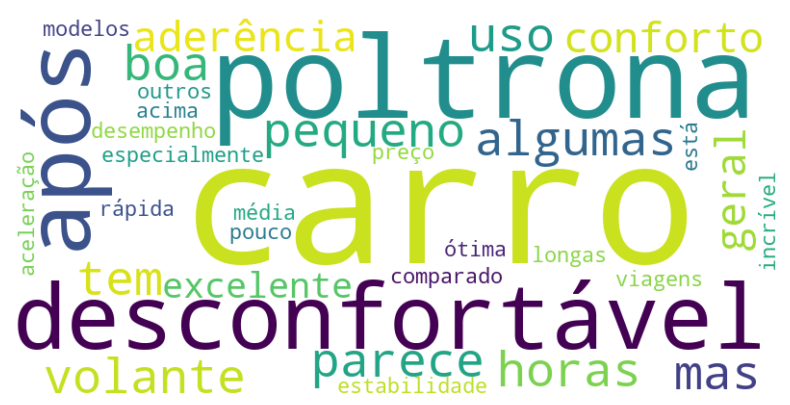

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unindo todos os comentários processados
all_comments = ' '.join(df_simulado['comentario_processado'])

# Gerando a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_comments)

# Exibindo a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


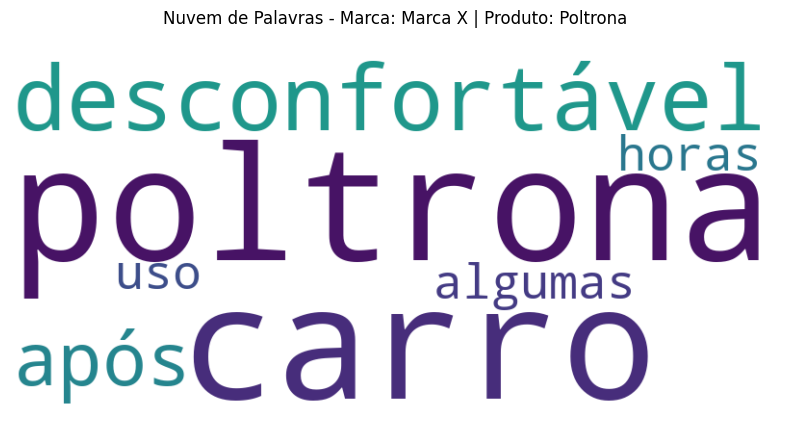

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Função para gerar nuvem de palavras filtrada por marca e produto
def gerar_nuvem_por_marca_produto(df, marca, produto):
    # Filtrando o DataFrame pela marca e produto
    df_filtrado = df[(df['marca'] == marca) & (df['produto'] == produto)]
    
    # Unindo todos os comentários processados filtrados
    all_comments = ' '.join(df_filtrado['comentario_processado'])
    
    # Gerando a nuvem de palavras
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_comments)
    
    # Exibindo a nuvem de palavras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nuvem de Palavras - Marca: {marca} | Produto: {produto}")
    plt.show()

# Exemplo de uso para gerar nuvem de palavras para Marca X e Produto Poltrona
gerar_nuvem_por_marca_produto(df_simulado, 'Marca X', 'Poltrona')


In [6]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Aplicando análise de sentimento
df_simulado['sentimento'] = df_simulado['comentario_processado'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Exibindo os resultados de forma mais organizada
print(df_simulado[['comentario', 'comentario_processado', 'sentimento']].to_string(index=False))

                                                                   comentario                                          comentario_processado  sentimento
              A poltrona do carro é desconfortável após algumas horas de uso.           poltrona carro desconfortável após algumas horas uso         0.0
                         O volante parece pequeno, mas tem uma boa aderência.                   volante parece pequeno mas tem boa aderência         0.0
      O conforto geral do carro é excelente, especialmente em longas viagens.    conforto geral carro excelente especialmente longas viagens         0.0
             O preço está um pouco acima da média comparado a outros modelos.          preço está pouco acima média comparado outros modelos         0.0
O desempenho do carro é incrível, com aceleração rápida e ótima estabilidade. desempenho carro incrível aceleração rápida ótima estabilidade         0.0


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\elder\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
from transformers import pipeline

# Carregando o pipeline de análise de sentimento com BERT
sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Aplicando o BERT para análise de sentimento nos comentários processados
df_simulado['resultado_bert'] = df_simulado['comentario_processado'].apply(lambda x: sentiment_analysis(x)[0])

# Separando os resultados em sentimento e score
df_simulado['label_bert'] = df_simulado['resultado_bert'].apply(lambda x: x['label'])
df_simulado['score_bert'] = df_simulado['resultado_bert'].apply(lambda x: x['score'])

# Exibindo os resultados
print(df_simulado[['comentario', 'comentario_processado', 'label_bert', 'score_bert']])


c:\Users\elder\Stellantis\bi\estudo_verbatins_ncbs\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                                          comentario  \
0  A poltrona do carro é desconfortável após algu...   
1  O volante parece pequeno, mas tem uma boa ader...   
2  O conforto geral do carro é excelente, especia...   
3  O preço está um pouco acima da média comparado...   
4  O desempenho do carro é incrível, com aceleraç...   

                               comentario_processado label_bert  score_bert  
0  poltrona carro desconfortável após algumas hor...     1 star    0.503560  
1       volante parece pequeno mas tem boa aderência    4 stars    0.469964  
2  conforto geral carro excelente especialmente l...    5 stars    0.615561  
3  preço está pouco acima média comparado outros ...    3 stars    0.534073  
4  desempenho carro incrível aceleração rápida ót...    5 stars    0.540415  


In [8]:
# Função para agrupar os sentimentos em Positivo, Negativo e Neutro
def agrupar_sentimento(label):
    if label in ['4 stars', '5 stars']:
        return 'Positivo'
    elif label == '3 stars':
        return 'Neutro'
    else:
        return 'Negativo'

# Aplicando a função de agrupamento
df_simulado['categoria_sentimento'] = df_simulado['label_bert'].apply(agrupar_sentimento)

# Calculando os percentuais de Positivo, Neutro e Negativo
percentuais_categoria = df_simulado['categoria_sentimento'].value_counts(normalize=True) * 100

# Exibindo os percentuais
print(percentuais_categoria)


categoria_sentimento
Positivo    60.0
Negativo    20.0
Neutro      20.0
Name: proportion, dtype: float64
